Get the weigths from the pretrained model and run the model through with one picture.
Loading the data and the label.

In [28]:
#import the necessary modules.
from keras import backend as K
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
import cv2, numpy as np
import os
import pandas
import matplotlib.pyplot as plt




In [ ]:
#this is the path to your data folder
PATH_pictures="/home/bombus/02456-deep-learning/Project/Data/ISIC_MSK-2_1/"

In [3]:
#a srting representing the current working directory
cwd=os.getcwd()

In [8]:
#dragand drop the weight into the same file as the python script
def VGG_16(weights_path=None):
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(3,224,224)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1000, activation='softmax'))

    if weights_path:
        model.load_weights(weights_path)

    return model


In [94]:
#funtion to open the analysis file
#'ISIC_MSK-2_1.csv'

def filename_label(analysis_filename):
    #inputs: The file name where the analysis data is 
    #ouputs: an np.array with in col 0 the name of the file and in col 1 the label
    data = pandas.read_csv('analysis/'+analysis_filename).values.tolist()
    data_array=np.zeros((len(data)-1,2),dtype='object')
    for i in range(len(data))[1:]:
        data_array[i-1,:]=[data[i][8]+'.jpg',data[i][2]]
    return data_array  

def show_data(filename,label):
    im=cv2.imread(PATH_pictures+filename)
    plt.figure()
    plt.title(label)
    plt.imshow(im)
    plt.show()



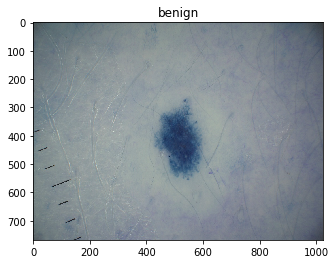

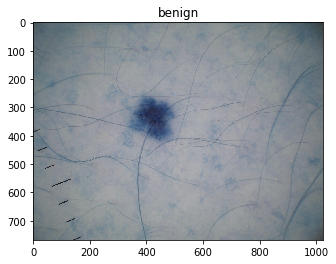

In [96]:
data=filename_label('ISIC_MSK-2_1.csv')
show_data(data[0,0],data[0,1])
show_data(data[1,0],data[1,1])

I tried with cutting out with numpy array, as then does the picture not deform.

In [57]:
from PIL import Image

(224, 224, 3) <class 'numpy.ndarray'>


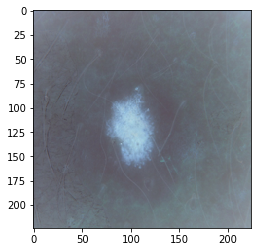

In [87]:
im=Image.open(PATH_pictures+data[0,0])
size=(299,299)
im.thumbnail(size)
im=np.array(im)
im=im[:,50:50+224,:].astype(np.float32)
print(im.shape,type(im))
plt.imshow(im)
plt.show()

In [92]:
if __name__ == "__main__":
    im=cv2.resize(cv2.imread(PATH_pictures+data[0,0]), (224, 224)).astype(np.float32)
    im[:,:,0] -= 103.939
    im[:,:,1] -= 116.779
    im[:,:,2] -= 123.68
    im = im.transpose((2,0,1))
    im = np.expand_dims(im, axis=0)
    #im = im.transpose((2,0,1))
    #im = np.expand_dims(im, axis=0)
    K.set_image_dim_ordering("th")
    

In [89]:
model = VGG16()
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy')
out = model.predict(im)
print(np.argmax(out))

/home/bombus/anaconda3/lib/python3.6/site-packages/keras/applications/vgg16.py:181: UserWarning: You are using the TensorFlow backend, yet you are using the Theano image data format convention (`image_data_format="channels_first"`). For best performance, set `image_data_format="channels_last"` in your Keras config at ~/.keras/keras.json.
  warnings.warn('You are using the TensorFlow backend, yet you '


669
